In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
df_produ = pd.read_csv("Crop Production.csv")
df_soil = pd.read_csv("Soil Type.csv")
df_rain = pd.read_csv("Rainfall.csv")

In [3]:
df_produ.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [4]:
df_produ.rename(columns={'State_Name': 'State', 'District_Name': 'District', 'Crop_Year':'Year'}, inplace=True)

In [5]:
df_produ.head()

,State,District,Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [6]:
mask_up = (df_produ['State'] == 'Maharashtra') | (df_produ['State'] == 'Tamil Nadu') | (df_produ['State'] == 'Uttar Pradesh') | (df_produ['State'] == 'West Bengal')

In [7]:
df_prod = df_produ[mask_up]

In [8]:
df_prod.to_csv("Crop_Production.csv", index=False)

In [9]:
top_crops = ['Maize', 'Urad', 'Sugarcane', 'Wheat', 'Rice']

In [10]:
df_prod = df_prod[df_prod['Crop'].isin(top_crops)]

In [11]:
df_prod.head()

,State,District,Year,Season,Crop,Area,Production
125191,Maharashtra,AHMEDNAGAR,1997,Autumn,Maize,1.0,1113.0
125196,Maharashtra,AHMEDNAGAR,1997,Kharif,Maize,4400.0,4700.0
125200,Maharashtra,AHMEDNAGAR,1997,Kharif,Rice,5900.0,7200.0
125201,Maharashtra,AHMEDNAGAR,1997,Kharif,Sugarcane,45900.0,38940.0
125203,Maharashtra,AHMEDNAGAR,1997,Kharif,Urad,1600.0,800.0


In [12]:
df_prod.shape

(16440, 7)

In [13]:
df_prod.Year.unique()

array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014], dtype=int64)

In [14]:
df_prod = df_prod[(df_prod['Year'] >= 2012) & (df_prod['Year'] <= 2014)]

In [15]:
df_prod.Year.unique()

array([2012, 2013, 2014], dtype=int64)

In [16]:
df_prod.Season.unique()

array(['Kharif     ', 'Rabi       ', 'Summer     ', 'Whole Year ',
       'Autumn     ', 'Winter     '], dtype=object)

In [17]:
df_prod['Season'] = df_prod['Season'].str.strip().str.capitalize()

In [18]:
df_prod['Season'].replace({'Summer':'Kharif', 'Winter':'Rabi'}, inplace=True)

In [19]:
df_prod.Season.unique()

array(['Kharif', 'Rabi', 'Whole year', 'Autumn'], dtype=object)

In [20]:
df_prod.drop(df_prod[df_prod['Season'] == 'Autumn'].index, inplace=True)

In [21]:
df_prod.Season.unique()

array(['Kharif', 'Rabi', 'Whole year'], dtype=object)

In [22]:
df_prod.to_csv('Crop_Production.csv', index=False)

In [23]:
df_prod['District'] = df_prod['District'].str.strip().str.capitalize()

In [24]:
df_prod.District.value_counts()

District
Sitapur          27
Deoria           27
Gorakhpur        27
Maharajganj      27
Hardoi           26
                 ..
Thiruvarur        8
Kanniyakumari     7
Ratnagiri         5
The nilgiris      4
Palghar           1
Name: count, Length: 158, dtype: int64

In [25]:
df_prod.to_csv('Crop_Production.csv', index=False)

In [26]:
df_prod.Crop.unique()

array(['Maize', 'Rice', 'Urad', 'Wheat', 'Sugarcane'], dtype=object)

In [27]:
target_states = ['Maharashtra', 'Tamil Nadu', 'Uttar Pradesh', 'West Bengal']

In [28]:
df_prod.District.unique()

array(['Ahmednagar', 'Akola', 'Amravati', 'Aurangabad', 'Beed',
       'Bhandara', 'Buldhana', 'Chandrapur', 'Dhule', 'Gadchiroli',
       'Gondia', 'Hingoli', 'Jalgaon', 'Jalna', 'Kolhapur', 'Latur',
       'Nagpur', 'Nanded', 'Nandurbar', 'Nashik', 'Osmanabad', 'Palghar',
       'Parbhani', 'Pune', 'Raigad', 'Ratnagiri', 'Sangli', 'Satara',
       'Sindhudurg', 'Solapur', 'Thane', 'Wardha', 'Washim', 'Yavatmal',
       'Ariyalur', 'Coimbatore', 'Cuddalore', 'Dharmapuri', 'Dindigul',
       'Erode', 'Kanchipuram', 'Kanniyakumari', 'Karur', 'Krishnagiri',
       'Madurai', 'Nagapattinam', 'Namakkal', 'Perambalur', 'Pudukkottai',
       'Ramanathapuram', 'Salem', 'Sivaganga', 'Thanjavur',
       'The nilgiris', 'Theni', 'Thiruvallur', 'Thiruvarur',
       'Tiruchirappalli', 'Tirunelveli', 'Tiruppur', 'Tiruvannamalai',
       'Tuticorin', 'Vellore', 'Villupuram', 'Virudhunagar', 'Agra',
       'Aligarh', 'Allahabad', 'Ambedkar nagar', 'Amethi', 'Amroha',
       'Auraiya', 'Azamgarh', 'Ba

In [29]:
district_counts = df_prod.groupby(['State', 'District']).size().reset_index(name='Count')

In [30]:
district_counts_sorted = district_counts.sort_values(by=['State','Count'], ascending=[True, False])

In [31]:
top_15_districts = district_counts_sorted.groupby('State').head(15)['District']

In [32]:
df_prod = df_prod[df_prod['District'].isin(top_15_districts)]

In [33]:
print(df_prod)

              State    District  Year      Season       Crop      Area  \
125615  Maharashtra  Ahmednagar  2012      Kharif      Maize   45000.0   
125620  Maharashtra  Ahmednagar  2012      Kharif       Rice    7500.0   
125624  Maharashtra  Ahmednagar  2012      Kharif       Urad    6100.0   
125628  Maharashtra  Ahmednagar  2012        Rabi      Maize   14700.0   
125632  Maharashtra  Ahmednagar  2012        Rabi      Wheat   38900.0   
...             ...         ...   ...         ...        ...       ...   
246084  West Bengal     Purulia  2014        Rabi      Wheat    1622.0   
246085  West Bengal     Purulia  2014      Kharif      Maize     325.0   
246086  West Bengal     Purulia  2014      Kharif       Rice     306.0   
246088  West Bengal     Purulia  2014  Whole year  Sugarcane     324.0   
246089  West Bengal     Purulia  2014        Rabi       Rice  279151.0   

        Production  
125615     91900.0  
125620      4600.0  
125624      1100.0  
125628     24800.0  
125632

In [34]:
df_prod.District.value_counts()

District
Deoria                27
Gorakhpur             27
Maharajganj           27
Sitapur               27
Unnao                 26
Hardoi                26
Kheri                 26
Mainpuri              25
Meerut                25
Moradabad             25
Shahjahanpur          25
Ambedkar nagar        24
Azamgarh              24
Bahraich              24
Amroha                24
Coochbehar            24
Darjeeling            24
Dinajpur uttar        24
Jalpaiguri            24
Medinipur west        24
Murshidabad           24
Nadia                 24
24 paraganas north    23
Bardhaman             22
Kolhapur              22
Bankura               21
Birbhum               21
Maldah                21
Beed                  20
Ahmednagar            20
Solapur               20
Satara                20
Dhule                 20
Nashik                20
Osmanabad             20
Pune                  20
Purulia               20
Sangli                19
Gondia                19
Nagpur          

In [35]:
df_prod.District.unique()

array(['Ahmednagar', 'Beed', 'Dhule', 'Gondia', 'Kolhapur', 'Nagpur',
       'Nanded', 'Nandurbar', 'Nashik', 'Osmanabad', 'Parbhani', 'Pune',
       'Sangli', 'Satara', 'Solapur', 'Ariyalur', 'Coimbatore',
       'Cuddalore', 'Dharmapuri', 'Dindigul', 'Erode', 'Kanchipuram',
       'Karur', 'Krishnagiri', 'Madurai', 'Nagapattinam', 'Namakkal',
       'Perambalur', 'Pudukkottai', 'Salem', 'Ambedkar nagar', 'Amroha',
       'Azamgarh', 'Bahraich', 'Deoria', 'Gorakhpur', 'Hardoi', 'Kheri',
       'Maharajganj', 'Mainpuri', 'Meerut', 'Moradabad', 'Shahjahanpur',
       'Sitapur', 'Unnao', '24 paraganas north', '24 paraganas south',
       'Bankura', 'Bardhaman', 'Birbhum', 'Coochbehar', 'Darjeeling',
       'Dinajpur uttar', 'Hooghly', 'Jalpaiguri', 'Maldah',
       'Medinipur west', 'Murshidabad', 'Nadia', 'Purulia'], dtype=object)

In [36]:
len(df_prod.District.unique())

60

In [37]:
df_prod.shape

(1160, 7)

In [38]:
df_prod = df_prod.reset_index(drop=True)
df_prod.index += 1

In [39]:
df_prod.head()

,State,District,Year,Season,Crop,Area,Production
1,Maharashtra,Ahmednagar,2012,Kharif,Maize,45000.0,91900.0
2,Maharashtra,Ahmednagar,2012,Kharif,Rice,7500.0,4600.0
3,Maharashtra,Ahmednagar,2012,Kharif,Urad,6100.0,1100.0
4,Maharashtra,Ahmednagar,2012,Rabi,Maize,14700.0,24800.0
5,Maharashtra,Ahmednagar,2012,Rabi,Wheat,38900.0,46100.0


In [40]:
df_prod.tail()

,State,District,Year,Season,Crop,Area,Production
1156,West Bengal,Purulia,2014,Rabi,Wheat,1622.0,3663.0
1157,West Bengal,Purulia,2014,Kharif,Maize,325.0,2039.0
1158,West Bengal,Purulia,2014,Kharif,Rice,306.0,801.0
1159,West Bengal,Purulia,2014,Whole year,Sugarcane,324.0,16250.0
1160,West Bengal,Purulia,2014,Rabi,Rice,279151.0,597899.0


## Data Cleaning

In [41]:
df_prod.shape

(1160, 7)

In [42]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160 entries, 1 to 1160
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       1160 non-null   object 
 1   District    1160 non-null   object 
 2   Year        1160 non-null   int64  
 3   Season      1160 non-null   object 
 4   Crop        1160 non-null   object 
 5   Area        1160 non-null   float64
 6   Production  1158 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 63.6+ KB


In [43]:
df_prod.describe()

,Year,Area,Production
count,1160.000000,1160.000000,1.158000e+03
mean,2012.943966,36871.797414,4.505082e+05
std,0.791106,69869.818849,1.819879e+06
min,2012.000000,1.000000,0.000000e+00
25%,2012.000000,453.750000,6.000000e+02
50%,2013.000000,4058.500000,1.101450e+04
75%,2014.000000,36224.500000,1.784348e+05
max,2014.000000,502667.000000,2.004970e+07


In [44]:
df_prod.head()

,State,District,Year,Season,Crop,Area,Production
1,Maharashtra,Ahmednagar,2012,Kharif,Maize,45000.0,91900.0
2,Maharashtra,Ahmednagar,2012,Kharif,Rice,7500.0,4600.0
3,Maharashtra,Ahmednagar,2012,Kharif,Urad,6100.0,1100.0
4,Maharashtra,Ahmednagar,2012,Rabi,Maize,14700.0,24800.0
5,Maharashtra,Ahmednagar,2012,Rabi,Wheat,38900.0,46100.0


In [45]:
df_prod.isnull().sum()

State         0
District      0
Year          0
Season        0
Crop          0
Area          0
Production    2
dtype: int64

In [46]:
df_prod['Production'].fillna(0, inplace=True)

In [47]:
df_prod.drop_duplicates(keep=False, inplace=True)

In [48]:
df_prod.isnull().sum()

State         0
District      0
Year          0
Season        0
Crop          0
Area          0
Production    0
dtype: int64

In [49]:
df_prod.to_csv('Crop_Production.csv', index=False)

### Adding Target Feature: Yield

In [50]:
df_prod["Yield"] = df_prod['Production']/df_prod['Area']

In [51]:
df_prod.head()

,State,District,Year,Season,Crop,Area,Production,Yield
1,Maharashtra,Ahmednagar,2012,Kharif,Maize,45000.0,91900.0,2.042222
2,Maharashtra,Ahmednagar,2012,Kharif,Rice,7500.0,4600.0,0.613333
3,Maharashtra,Ahmednagar,2012,Kharif,Urad,6100.0,1100.0,0.180328
4,Maharashtra,Ahmednagar,2012,Rabi,Maize,14700.0,24800.0,1.687075
5,Maharashtra,Ahmednagar,2012,Rabi,Wheat,38900.0,46100.0,1.185090


In [52]:
df_prod.shape

(1158, 8)

### Adding District Wise Data of Soil Type

In [53]:
df_merge = pd.merge(df_prod, df_soil, on=['State', 'District'], how='inner')

In [54]:
df_merge = df_merge.reset_index(drop=True)
df_merge.index += 1

In [55]:
df_merge.head()

,State,District,Year,Season,Crop,Area,Production,Yield,Soil Type
1,Maharashtra,Ahmednagar,2012,Kharif,Maize,45000.0,91900.0,2.042222,"Black Soil, Red Soil, Alluvial Soil, Laterite ..."
2,Maharashtra,Ahmednagar,2012,Kharif,Rice,7500.0,4600.0,0.613333,"Black Soil, Red Soil, Alluvial Soil, Laterite ..."
3,Maharashtra,Ahmednagar,2012,Kharif,Urad,6100.0,1100.0,0.180328,"Black Soil, Red Soil, Alluvial Soil, Laterite ..."
4,Maharashtra,Ahmednagar,2012,Rabi,Maize,14700.0,24800.0,1.687075,"Black Soil, Red Soil, Alluvial Soil, Laterite ..."
5,Maharashtra,Ahmednagar,2012,Rabi,Wheat,38900.0,46100.0,1.185090,"Black Soil, Red Soil, Alluvial Soil, Laterite ..."


In [56]:
df_merge.to_csv('Dataset.csv', index=False)

In [57]:
unique_soil_types = set([soil.strip().lower() for types in df_merge['Soil Type'] for soil in types.split(',')])
soil_dummies = pd.DataFrame({soil_type: [int(1) if soil_type in types.lower() else int(0) for types in df_merge['Soil Type']] for soil_type in unique_soil_types})

print(type(unique_soil_types))

<class 'set'>


In [58]:
print(unique_soil_types)

{'sandy soil', 'loamy soil', 'mountain soil', 'red soil', 'clayey soil', 'black soil', 'laterite soil', 'forest soil', 'alluvial soil'}


In [59]:
soil_dummies = soil_dummies.astype(int)

print(soil_dummies)

      sandy soil  loamy soil  mountain soil  red soil  clayey soil  \
0              0           0              0         1            0   
1              0           0              0         1            0   
2              0           0              0         1            0   
3              0           0              0         1            0   
4              0           0              0         1            0   
...          ...         ...            ...       ...          ...   
1000           0           0              0         1            0   
1001           0           0              0         1            0   
1002           0           0              0         1            0   
1003           0           0              0         1            0   
1004           0           0              0         1            0   

      black soil  laterite soil  forest soil  alluvial soil  
0              1              1            0              1  
1              1              1    

In [60]:
df_merge = pd.concat([df_merge, soil_dummies], axis=1)

df_merge = df_merge.dropna()

In [61]:
for cn in soil_dummies.columns:
    if cn in df_merge.columns:
        df_merge[cn] = df_merge[cn].astype(int)
print(df_merge)

            State    District    Year      Season       Crop     Area  \
1     Maharashtra  Ahmednagar  2012.0      Kharif      Maize  45000.0   
2     Maharashtra  Ahmednagar  2012.0      Kharif       Rice   7500.0   
3     Maharashtra  Ahmednagar  2012.0      Kharif       Urad   6100.0   
4     Maharashtra  Ahmednagar  2012.0        Rabi      Maize  14700.0   
5     Maharashtra  Ahmednagar  2012.0        Rabi      Wheat  38900.0   
...           ...         ...     ...         ...        ...      ...   
1000  West Bengal     Purulia  2014.0        Rabi       Urad    220.0   
1001  West Bengal     Purulia  2014.0        Rabi      Wheat   1622.0   
1002  West Bengal     Purulia  2014.0      Kharif      Maize    325.0   
1003  West Bengal     Purulia  2014.0      Kharif       Rice    306.0   
1004  West Bengal     Purulia  2014.0  Whole year  Sugarcane    324.0   

      Production      Yield  \
1        91900.0   2.042222   
2         4600.0   0.613333   
3         1100.0   0.180328   

In [62]:
df_merge.head()

,State,District,Year,Season,Crop,Area,Production,Yield,Soil Type,sandy soil,loamy soil,mountain soil,red soil,clayey soil,black soil,laterite soil,forest soil,alluvial soil
1,Maharashtra,Ahmednagar,2012.0,Kharif,Maize,45000.0,91900.0,2.042222,"Black Soil, Red Soil, Alluvial Soil, Laterite ...",0,0,0,1,0,1,1,0,1
2,Maharashtra,Ahmednagar,2012.0,Kharif,Rice,7500.0,4600.0,0.613333,"Black Soil, Red Soil, Alluvial Soil, Laterite ...",0,0,0,1,0,1,1,0,1
3,Maharashtra,Ahmednagar,2012.0,Kharif,Urad,6100.0,1100.0,0.180328,"Black Soil, Red Soil, Alluvial Soil, Laterite ...",0,0,0,1,0,1,1,0,1
4,Maharashtra,Ahmednagar,2012.0,Rabi,Maize,14700.0,24800.0,1.687075,"Black Soil, Red Soil, Alluvial Soil, Laterite ...",0,0,0,1,0,1,1,0,1
5,Maharashtra,Ahmednagar,2012.0,Rabi,Wheat,38900.0,46100.0,1.185090,"Black Soil, Red Soil, Alluvial Soil, Laterite ...",0,0,0,1,0,1,1,0,1


In [63]:
df_merge = df_merge.drop('Soil Type', axis=1)

In [64]:
df_merge.to_csv('Dataset.csv', index=False)

In [65]:
df_merge.head()

,State,District,Year,Season,Crop,Area,Production,Yield,sandy soil,loamy soil,mountain soil,red soil,clayey soil,black soil,laterite soil,forest soil,alluvial soil
1,Maharashtra,Ahmednagar,2012.0,Kharif,Maize,45000.0,91900.0,2.042222,0,0,0,1,0,1,1,0,1
2,Maharashtra,Ahmednagar,2012.0,Kharif,Rice,7500.0,4600.0,0.613333,0,0,0,1,0,1,1,0,1
3,Maharashtra,Ahmednagar,2012.0,Kharif,Urad,6100.0,1100.0,0.180328,0,0,0,1,0,1,1,0,1
4,Maharashtra,Ahmednagar,2012.0,Rabi,Maize,14700.0,24800.0,1.687075,0,0,0,1,0,1,1,0,1
5,Maharashtra,Ahmednagar,2012.0,Rabi,Wheat,38900.0,46100.0,1.185090,0,0,0,1,0,1,1,0,1


In [66]:
df_rain.Year.unique()

df_rain['Year'] = df_rain['Year'].astype(int)

df_rain

,State,District,Year,January,February,March,April,May,June,July,August,September,October,November,December,Annual
0,Maharashtra,Ahmednagar,2012,0.0,0.0,0.0,3.5,10.3,40.0,86.0,63.6,90.8,99.2,0.7,0.0,394.1
1,Maharashtra,Ahmednagar,2013,0.0,1.0,0.0,0.0,0.0,142.1,144.1,56.0,182.5,75.5,0.0,0.0,601.2
2,Maharashtra,Ahmednagar,2014,0.1,1.7,32.7,0.1,14.6,21.0,92.9,198.7,44.6,27.6,63.1,3.4,500.5
3,Maharashtra,Beed,2012,0.0,0.0,0.0,0.0,0.0,55.4,107.4,81.6,105.0,81.3,0.9,0.0,431.6
4,Maharashtra,Beed,2013,0.0,0.0,1.2,4.6,2.2,127.6,205.0,92.3,152.8,76.9,3.0,24.9,690.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,West Bengal,Nadia,2013,6.3,9.1,1.5,39.3,149.7,188.1,181.1,327.0,160.7,224.8,0.0,0.2,1287.8
176,West Bengal,Nadia,2014,0.8,50.2,17.1,0.0,92.0,221.4,203.1,236.7,218.8,56.7,0.0,0.0,1096.8
177,West Bengal,Purulia,2012,38.2,25.7,6.3,75.0,37.6,145.9,329.0,316.9,319.0,38.1,52.3,16.9,1400.9
178,West Bengal,Purulia,2013,0.7,13.8,6.7,47.1,294.1,200.9,246.6,302.8,233.8,434.6,0.0,0.0,1781.1


## Exploratory Data Analysis

In [67]:
df_rain.Year.unique()

array([2012, 2013, 2014])

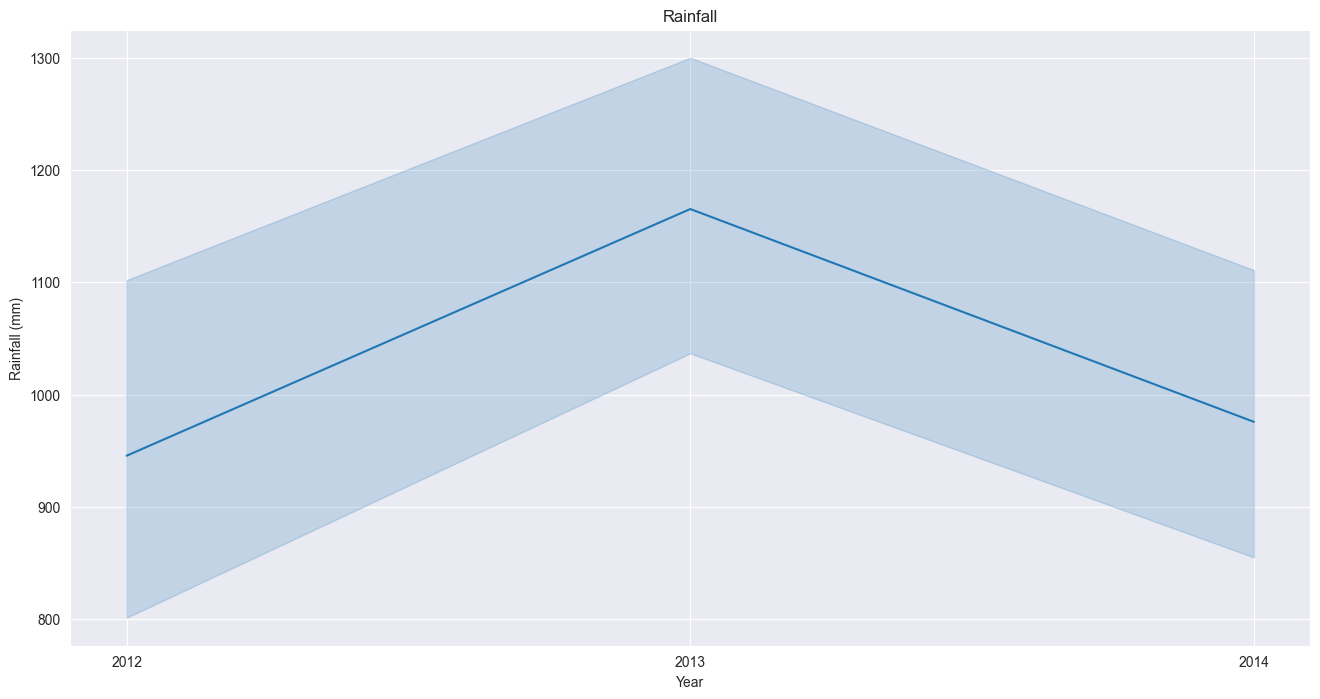

In [68]:
plt.figure(figsize=(16,8))
sns.set_style('darkgrid')
sns.lineplot(x='Year', y='Annual', data=df_rain)
plt.xticks((df_rain.Year.unique()))
plt.title('Rainfall')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.show()

In [69]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1004 entries, 1 to 1004
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          1004 non-null   object 
 1   District       1004 non-null   object 
 2   Year           1004 non-null   float64
 3   Season         1004 non-null   object 
 4   Crop           1004 non-null   object 
 5   Area           1004 non-null   float64
 6   Production     1004 non-null   float64
 7   Yield          1004 non-null   float64
 8   sandy soil     1004 non-null   int32  
 9   loamy soil     1004 non-null   int32  
 10  mountain soil  1004 non-null   int32  
 11  red soil       1004 non-null   int32  
 12  clayey soil    1004 non-null   int32  
 13  black soil     1004 non-null   int32  
 14  laterite soil  1004 non-null   int32  
 15  forest soil    1004 non-null   int32  
 16  alluvial soil  1004 non-null   int32  
dtypes: float64(4), int32(9), object(4)
memory usage: 105.9+ K

In [70]:
df_merge.shape

(1004, 17)